### Set Required Packeges

In [ ]:
#install the packs if needed
!pip install -q --upgrade pip
!pip install -q pandas
!pip install -q matplotlib
!pip install -q math
!pip install -q sklearn

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [ ]:
#importing packeges and functions
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

# KNN functions

In [ ]:
def distance_cal(dataframe, point):             #Calculating the distance between two points in a 2D serface.
    dataframe['distance'] = None
    x1, y1= point
    temp_distanse_list = []
    
    for index, row in dataframe.iterrows():
        distance = math.sqrt((row['X']-x1)**2 + (row['Y']-y1)**2)
        temp_distanse_list.append(distance)

    dataframe["distance"] = temp_distanse_list 
    return dataframe   

In [ ]:
def KNN(test_dataframe, neighbours_num, x_train_dataframe, y_train_dataframe):              #Find the points' labels 
    label_list = []
    for index, point in test_dataframe.iterrows():
        dataframe = distance_cal(x_train_dataframe, point)
        dataframe = dataframe.sort_values("distance", ascending=True)
        dataframe =dataframe.head(neighbours_num)
        index_list = dataframe.index.to_list()
        label = y_train_dataframe[y_train_dataframe.index.isin(index_list)].value_counts().idxmax()
        label_list.append(label)
    return label_list
    

In [ ]:
def accuracy_cal(X_test, label_list, Y_test):           #Calculate KNN accuracy based on supervised points' labels
    # X_test['label'] = label_list
    true_count = 0
    checked_dataframe = (label_list == Y_test)
    true_count = checked_dataframe.sum()/ len(checked_dataframe)
    return true_count*100


In [ ]:
def data_plot(dataframe, test_dataframe, label_list):           #plot function with the class separated colors
    class0_dataframe = dataframe[dataframe['label'] == 0]
    class1_dataframe = dataframe[dataframe['label'] == 1]
    class2_dataframe = dataframe[dataframe['label'] == 2]
    class3_dataframe = dataframe[dataframe['label'] == 3]
    plt.figure(figsize=(10,10))
    # temp_df = pd.DataFrame()
    mlist = []
    color_map = {0:"blue", 1:"orange", 2:"green", 3:"red"}
    for item in label_list:
        mlist.append(color_map[item])
    plt.scatter(class0_dataframe['X'], class0_dataframe['Y'], label = 'class0')
    plt.scatter(class1_dataframe['X'], class1_dataframe['Y'], label = 'class1')
    plt.scatter(class2_dataframe['X'], class2_dataframe['Y'], label = 'class2')
    plt.scatter(class3_dataframe['X'], class3_dataframe['Y'], label = 'class3')
    plt.scatter(test_dataframe['X'], test_dataframe['Y'], label = 'test points', marker= '*', color = mlist )
    plt.legend()
    plt.grid()
    plt.savefig('Scatter.pdf')

# Load data

In [ ]:
def load_dataframe():
    dataframe = pd.read_csv("KNN_data_set1.csv")
    dataframe = dataframe[["X", "Y", "label"]]
    return dataframe

In [ ]:
def train_dataframe_split(dataframe, testsize):
    X_train, X_test, Y_train, Y_test = train_test_split(dataframe[["X", "Y"]], dataframe["label"], test_size= testsize, random_state= 1)
    X_train["label"] = Y_train
    train_dataframe = X_train
    return train_dataframe

# hyperparameter tuning: K

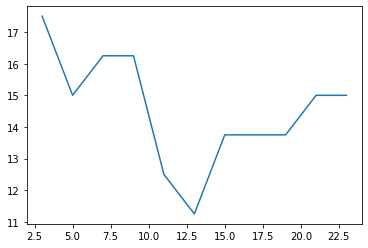

In [ ]:
dataframe = load_dataframe()
mylist = []
range_list = range(3, 25, 2)
X_train, X_test, Y_train, Y_test = train_test_split(dataframe[["X", "Y"]], dataframe["label"], test_size= 0.2, random_state= 1)

for k in range_list:    
    label_list = KNN(X_test, k, X_train, Y_train)
    mylist.append(100 -accuracy_cal(X_test, label_list, Y_test))

plt.plot(range_list, mylist)

# KNN execution

88.0

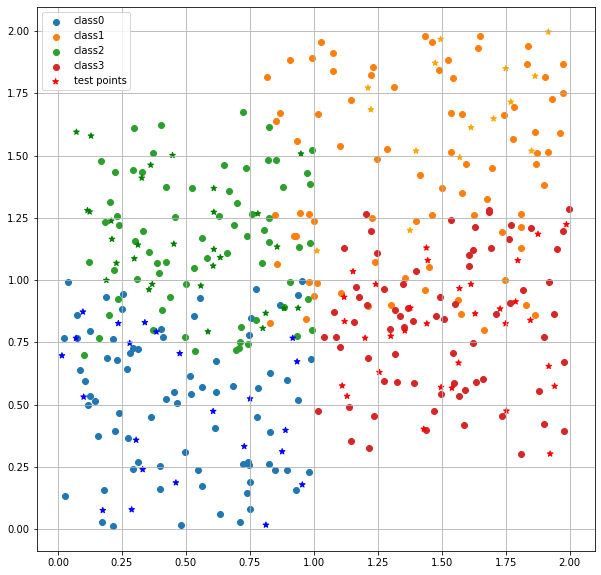

In [ ]:
dataframe = load_dataframe()
X_train, X_test, Y_train, Y_test = train_test_split(dataframe[["X", "Y"]], dataframe["label"], test_size= 0.2, random_state= 1)
label_list = KNN(X_test, 13, X_train, Y_train)
data_plot(train_dataframe_split(dataframe, 0.2), X_test, label_list)
print("accuracy: " + accuracy_cal(X_test, label_list, Y_test)

